ALGORITMOS

---

Hill-Climbing

```
solucao_inicial = valor_aleatorio_dentro_do_espaco_de_busca()

while fitness(solucao_incial) != fitness_ideal:
  nova_solucao = realizar_mudanca_na_solucao(solucao_inicial)
  if fitness(nova_solucao) > fitness(solucao_inicial): # PODE SER MAIOR QUE OU MENOR QUE, DEPENDE DO PROBLEMA
    solucao_incial = nova_solucao
```

O pseudo-codigo acima parte do principio que se sabe o fitness ideal, caso não se saiba pode-se mudar a condicao de parada. Outros exemplos de condições de parada podem ser um determinada quantidade de tempo, um numero de iterações, um determinado fitness, um numero de iteracoes sem melhora etc.


---

Tabu Search

No Tabu Search o algoritmo salva as K ultimas soluções visitadas e as evita, dessa forma reduzindo a chance de ficar preso em platôs

```
TAMANHO_DA_MEMORIA = 10 # PARAMETRO
ITERACOES = 2000 # PARAMETRO
memoria = []
solucao_inicial = valor_aleatorio_dentro_do_espaco_de_busca()

for i in range(0, 2000):
  nova_solucao = realizar_mudanca_na_solucao(solucao_inicial)

  solucao_ja_testada = true
  while solucao_ja_testada:
    solucao_ja_testada = verificar_se_solucao_na_memoria()
    if solucao_ja_testada:
      nova_solucao = realizar_mudanca_na_solucao(solucao_inicial)

  if len(memoria) == TAMANHO_DA_MEMORIA:
    memoria.pop(0) # remove o primeiro elemento da lista
  memoria.append(nova_solucao) #adiciona um elemento no final da lista

  if fitness(nova_solucao) >= fitness(solucao_inicial): # AQUI COLOCAMOS O IGUAL SEM PROCUPAÇÃO POIS O ALGORITMO TEM O MECANISMO QUE EVITA PLATÔS
    solucao_incial = nova_solucao
```



---

Simulated Annealing

```
solucao_inicial = valor_aleatorio_dentro_do_espaco_de_busca()

Temperatura_maxima = parametro_1
Temperatura_minima = parametro_2
Temperatura_atual = Temperatura_maxima

while Temperatura_atual > Temperatura_minima:
  nova_solucao = realizar_mudanca_na_solucao(solucao_inicial)
  if fitness(nova_solucao) < fitness(solucao_inicial):
    solucao_incial = nova_solucao

  elif exp((fitness(solucao_inicial) - fitness(nova_solucao))/Temperatura_atual) > random(0,1): 
  # caso seja um problema de maximização a ordem do fitness inverte
    solucao_incial = nova_solucao
  temperatura_atual = atualizar_temperatura()
```

No Simulated Annealing existe o conceito de temperatura que possibilita em alguns casos o algoritmo ir para um local com um fitness pior, isso é feito para incentivar exploração e evitar pontos de otimo local

---

Iterated Local Search

```
solucao_inicial = valor_aleatorio_dentro_do_espaco_de_busca()
 
while fitness(solucao_incial) != fitness_ideal:

  nova_solucao = perturbacao(solucao_inicial) 

  nova_solucao = realizar_mudanca_na_solucao(nova_solucao)
  if fitness(nova_solucao) > fitness(solucao_inicial): # PODE SER MAIOR QUE OU MENOR QUE, DEPENDE DO PROBLEMA
    solucao_incial = nova_solucao
```

No Iterated Local Search é realizado uma perturbação na solução para incentivar exploração


---

Local Beam

Já no Local Beam a logica segue a do Hill-Climbing, mas ao invés de ter um indivíduo o algoritmo mantem uma quantidade K de indivíduos.

```
solucoes_atuais = [] 
K = parametro_1

for i in range(0, K):
  solucoes_atuais.append(valor_aleatorio_dentro_do_espaco_de_busca())

while criterio de parada:
  novas_solucoes = realizar_mudanca_nas_solucoes(solucoes_atuais) 
  todas_as_solucoes = novas_solucoes.append(solucoes_atuais)
  todas_as_solucoes = remover_piores_solucoes(todas_as_solucoes) 
```

PROBLEMAS

---

N Rainhas 

Dado um tabuleiro NxN Coloque nele N rainhas de maneira que nenhuma rainha possa atacar outra (Ou seja não é Permitido colocar uma rainha na mesma linha, coluna ou diagonal que outra)

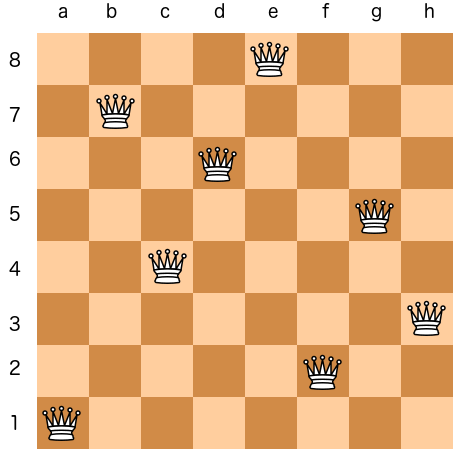

---

Caixeiro Viajante

Um comerciente deseja viajar por varias cidades comprando e vendendo produtos. Ele quer seguir uma rota que tenha a menor distancia possivel, mas sem passar pela mesma cidade 2 vezes.  E apos passar por todas as cidades, ele precisa voltar a cidade em que ele iniciou seu percurso.

Ou seja: dado N pontos como podemos passar por todos 1 vez e voltar ao ponto zero?

Usando uma busca exaustiva a complexidade desse problema seria N! Ou seja se voce tivesse 100 cidades (9.332622e+157 possiveis rotas) e rodasse o algoritmo completo o universo iria acabar e o codigo nao teria terminado de rodar.

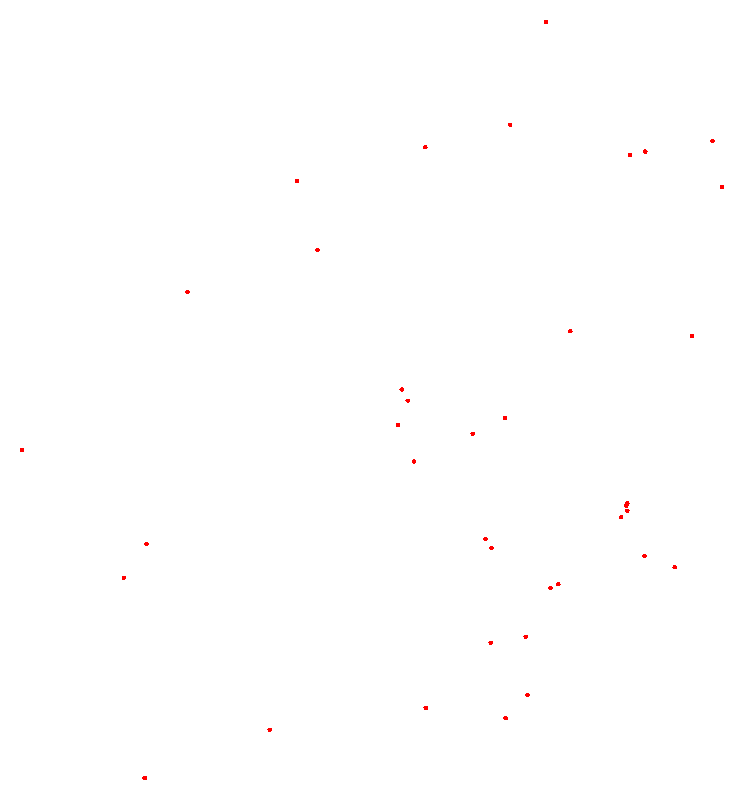

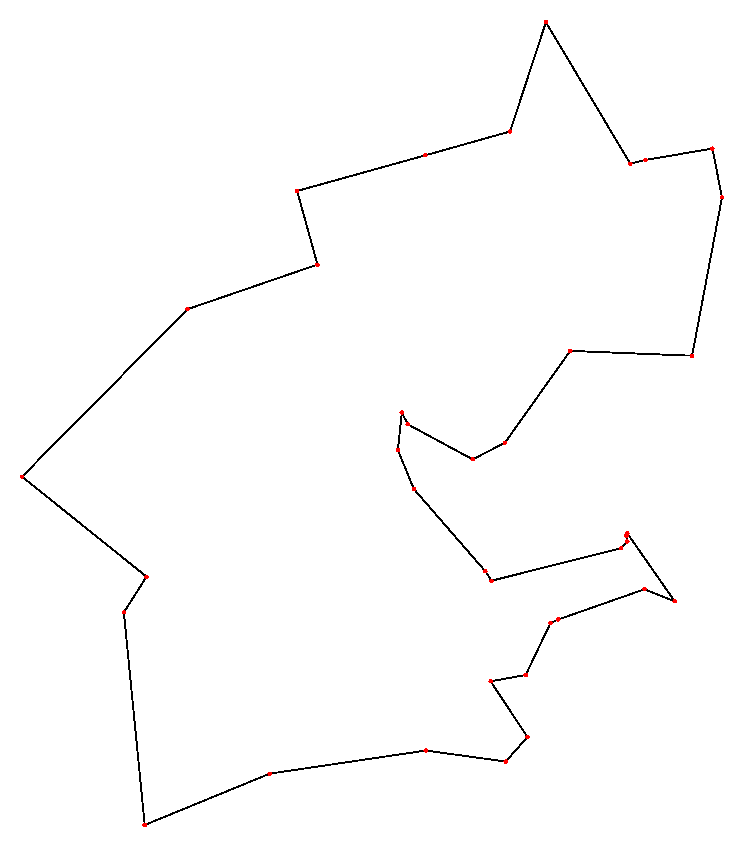

In [ ]:
# Imports

import random
import math

# Biblioteca para geração de graficos para facilitar visualizão
import matplotlib.pyplot as plt


In [ ]:
# Codigo para o problema do caixeiro viajante
NUMERO_DE_CIDADES = 38

POSICOES = [
[ 11003.611100, 42102.500000],
[ 11108.611100, 42373.888900],
[ 11133.333300, 42885.833300],
[ 11155.833300, 42712.500000],
[ 11183.333300, 42933.333300],
[ 11297.500000, 42853.333300],
[ 11310.277800, 42929.444400],
[ 11416.666700, 42983.333300],
[ 11423.888900, 43000.277800],
[ 11438.333300, 42057.222200],
[ 11461.111100, 43252.777800],
[ 11485.555600, 43187.222200],
[ 11503.055600, 42855.277800],
[ 11511.388900, 42106.388900],
[ 11522.222200, 42841.944400],
[ 11569.444400, 43136.666700],
[ 11583.333300, 43150.000000],
[ 11595.000000, 43148.055600],
[ 11600.000000, 43150.000000],
[ 11690.555600, 42686.666700],
[ 11715.833300, 41836.111100],
[ 11751.111100, 42814.444400],
[ 11770.277800, 42651.944400],
[ 11785.277800, 42884.444400],
[ 11822.777800, 42673.611100],
[ 11846.944400, 42660.555600],
[ 11963.055600, 43290.555600],
[ 11973.055600, 43026.111100],
[ 12058.333300, 42195.555600],
[ 12149.444400, 42477.500000],
[ 12286.944400, 43355.555600],
[ 12300.000000, 42433.333300],
[ 12355.833300, 43156.388900],
[ 12363.333300, 43189.166700],
[ 12372.777800, 42711.388900],
[ 12386.666700, 43334.722200],
[ 12421.666700, 42895.555600],
[ 12645.000000, 42973.333300]]
# Fonte: http://www.math.uwaterloo.ca/tsp/world/countries.html
# Melhor resultado possivel: 6656
# Numero de cidades: 38
# Numero de possiveis caminhos: 5.2302262e+44

class cidade:
  def __init__(self, x, y):
    self.posicao_x = x
    self.posicao_y = y
  def distancia(self, cidade_externa):
    return  math.sqrt((self.posicao_x - cidade_externa.posicao_x)**2 + 
                      (self.posicao_y - cidade_externa.posicao_y)**2

# Cria uma lista de instancias de cidade
def cidades_inicial_usando_referencia():
  lista = []
  for i in range(0, NUMERO_DE_CIDADES):
    lista.append(cidade(POSICOES[i][0], POSICOES[i][1]))
  return lista

def gerar_solucao_aleatoria():
  lista_de_cidades = list(range(0, NUMERO_DE_CIDADES))
  lista_aleatoria = []
  for i in range(0, NUMERO_DE_CIDADES):
    cidade = random.choice(lista_de_cidades)
    lista_aleatoria.append(cidade)
    lista_de_cidades.remove(cidade)
  return lista_aleatoria

def fitness(possivel_solucao):
  fitness = 0
  for i in range(0, NUMERO_DE_CIDADES): 
    if i < NUMERO_DE_CIDADES - 1:
      fitness += cidades[possivel_solucao[i]].distancia(cidades[possivel_solucao[i+1]])
    else:
      fitness += cidades[possivel_solucao[i]].distancia(cidades[possivel_solucao[0]])
  return fitness

def mudar_solucao(solucao):
  solucao_modificada = []
  for i in range(0, NUMERO_DE_CIDADES):
    solucao_modificada.append(solucao[i])
  index_1 = random.randint(0, NUMERO_DE_CIDADES - 1)
  index_2 = random.randint(0, NUMERO_DE_CIDADES - 1)
  while(index_1 == index_2):
    index_2 = random.randint(0, NUMERO_DE_CIDADES - 1)
  cidade_1 = solucao[index_1]
  cidade_2 = solucao[index_2]
  solucao_modificada[index_2] = cidade_1
  solucao_modificada[index_1] = cidade_2
  return solucao_modificada

In [ ]:
# Codigo para o problema das N rainhas

NUMERO_DE_RAINHAS = 25

# No python quando se faz lista_A = lista_B as listas ficam ligadas e caso se 
# mude uma tambem se muda a outra, usar o copy é uma maneira de evitar isso
import copy

class rainha:
  def __init__(self, posicao_x):
    self.x = posicao_x

def gerar_solucao_aleatoria_n_rainhas():
  lista_aleatoria = []
  for i in range(0, NUMERO_DE_RAINHAS):
    lista_aleatoria.append(rainha(random.randint(0, NUMERO_DE_RAINHAS - 1)))
  return lista_aleatoria

def fitness_n_rainhas(possivel_solucao):
  fitness = 0
  for i in range(0, NUMERO_DE_RAINHAS-1): 
    for j in range(i+1, NUMERO_DE_RAINHAS):
      if possivel_solucao[i].x == possivel_solucao[j].x:
        fitness += 1
      if ((possivel_solucao[i].x + j - i) == possivel_solucao[j].x) or ((possivel_solucao[i].x - j + i) == possivel_solucao[j].x):
        fitness += 1
  return fitness

def mudar_solucao_n_rainhas(solucao):
  solucao_modificada = copy.deepcopy(solucao)
  index = random.randint(0, NUMERO_DE_RAINHAS - 1)
  posicao_1 = random.randint(0, NUMERO_DE_RAINHAS - 1)
  while posicao_1 == solucao_modificada[index].x:
    posicao_1 = random.randint(0, NUMERO_DE_RAINHAS - 1)
  solucao_modificada[index].x = posicao_1
  
  return solucao_modificada

In [ ]:
# --- Codigo para visualização ---

# --- Codigo para demonstração visual utilizando matplotlib ---

# Caixeiro Viajante
def gerar_grafico(lista_cidades, solucao):
  x = []
  y = []
  for i in range(0, NUMERO_DE_CIDADES):
    x.append(lista_cidades[solucao[i]].posicao_x)
    y.append(lista_cidades[solucao[i]].posicao_y)
    plt.plot(lista_cidades[solucao[i]].posicao_x, 
             lista_cidades[solucao[i]].posicao_y, 'ro')

  x.append(lista_cidades[solucao[0]].posicao_x)
  y.append(lista_cidades[solucao[0]].posicao_y)
  plt.plot(x, y)
  plt.title('Solução aleatoria inicial')
  plt.show()
# --- Fim do codigo para demonstração visual utilizando matplotlib ---

In [ ]:
# --- Algoritimo: Hill Climbing ---
# --- Problema: Caixeiro Viajante ---

# Parametros
MAX_NUMERO_DE_ITERACOES = 50000

cidades = cidades_inicial_usando_referencia()

def executar_hill_climbing():

  # É gerada uma solução inicial aleatoria
  solucao_atual = gerar_solucao_aleatoria()

  # É calculado o fitness da solução incial
  melhor_fitness = fitness(solucao_atual)

  # É definido um criterio de parada
  numero_de_iteracoes = MAX_NUMERO_DE_ITERACOES

  # print('Fitness Inicial: ', "%.3f" % melhor_fitness)

  # --- Função para demonstração visual utilizando matplotlib ---
  # gerar_grafico(cidades, solucao_atual)

  # --- Inicio da execução do algoritimo ---

  # Criterio de parada 1
  # Seguro pois independe do que acontecer no algoritimo o codigo ira finalizar 
  # sua execução
  for i in range(0, numero_de_iteracoes):

  # Criterio de parada 2 
  # Pode causar problemas pois caso o valor de fitness desejado nao seja atingido
  # (caso o algoritimo fique preso num ponto de otimo local por exemplo) o 
  # algoritimo pode ficar rodando indeterminadamente
  # while True:
  # if melhor_fitness < 7000:
  #   break

    # Uma nova solução é gerada
    nova_solucao = mudar_solucao(solucao_atual)

    # A nova solução é comparada com a anterior
    if fitness(nova_solucao) < fitness(solucao_atual):

      # Caso ela seja melhor a anterior é substituida pela nova
      solucao_atual.clear()
      for j in range(0, NUMERO_DE_CIDADES):
        solucao_atual.append(nova_solucao[j])
      # e o melhor fitness é atualizado
      melhor_fitness = fitness(solucao_atual)

  # --- Função para demonstração visual utilizando matplotlib ---
  # gerar_grafico(cidades, solucao_atual)

  return melhor_fitness

  # --- Fim da execução do algoritimo ---



In [ ]:
# --- Algoritimo: Tabu Search ---
# --- Problema: N Rainhas ---

# Parametros
MAX_NUMERO_DE_ITERACOES_TABU = 4000
MEMORIA_MAXIMA = 10
memoria = []

def executar_tabu_search():

  # É gerada uma solução inicial aleatoria
  solucao_atual = gerar_solucao_aleatoria_n_rainhas()

  # É calculado o fitness da solução incial
  melhor_fitness = fitness_n_rainhas(solucao_atual)

  # É definido um criterio de parada
  numero_de_iteracoes = MAX_NUMERO_DE_ITERACOES_TABU

  # print('Fitness Inicial: ', melhor_fitness)

  # --- Inicio da execução do algoritimo ---

  # Criterio de parada
  for i in range(0, numero_de_iteracoes):

    # Uma nova solução é gerada
    nova_solucao = mudar_solucao_n_rainhas(solucao_atual)

    solucao_ja_testada = True
    while solucao_ja_testada:
      for k in memoria:
        for z in range(0, NUMERO_DE_RAINHAS):
          if k[z].x == nova_solucao[z].x:
            solucao_ja_testada = True
            break
      else:
        solucao_ja_testada = False
      if solucao_ja_testada:
        nova_solucao = realizar_mudanca_na_solucao(solucao_atual)
 
    if len(memoria) == MEMORIA_MAXIMA:
      memoria.pop(0)
    memoria.append(copy.deepcopy(nova_solucao))

    # A nova solução é comparada com a anterior
    if fitness_n_rainhas(nova_solucao) <= fitness_n_rainhas(solucao_atual):
      # Caso ela seja melhor a anterior é substituida pela nova
      solucao_atual.clear()
      for j in range(0, NUMERO_DE_RAINHAS):
        solucao_atual.append(nova_solucao[j])
      # e o melhor fitness é atualizado
      melhor_fitness = fitness_n_rainhas(solucao_atual)

  return melhor_fitness

  # --- Fim da execução do algoritimo ---


In [ ]:
# --- Algoritimo: Simulated Annealing ---
# --- Problema: Caixeiro Viajante ---

# para calcular e^x, pois a biblioteca math estava dando erro
import numpy as np

# Parametros
TEMPERATURA_MAXIMA = 500.0
TEMPERATURA_MINIMA = 0.01

cidades = cidades_inicial_usando_referencia()

def executar_simulated_annealing():

  # É gerada uma solução inicial aleatoria
  solucao_atual = gerar_solucao_aleatoria()

  # É calculado o fitness da solução incial
  fitness_atual = fitness(solucao_atual)

  # É definido um criterio de parada
  temperatura = TEMPERATURA_MAXIMA

  # print('Fitness Inicial: ', "%.3f" % fitness_atual)

  # --- Função para demonstração visual utilizando matplotlib ---
  # gerar_grafico(cidades, solucao_atual)

  # --- Inicio da execução do algoritimo ---

  # Criterio de parada 
  while temperatura > TEMPERATURA_MINIMA:

    # Uma nova solução é gerada
    nova_solucao = mudar_solucao(solucao_atual)

    # A nova solução é comparada com a anterior
    if fitness(nova_solucao) < fitness(solucao_atual):

      # Caso ela seja melhor a anterior é substituida pela nova
      solucao_atual.clear()
      for j in range(0, NUMERO_DE_CIDADES):
        solucao_atual.append(nova_solucao[j])
      # e o melhor fitness é atualizado
      fitness_atual = fitness(solucao_atual)
    
    # Mesmo que o novo local seja pior que o anterior existe uma chance que o 
    # algoritmo va a ele, isso é feito para aumentar a exploração e evitar 
    # otimos locais
    elif np.exp(((fitness(solucao_atual) - fitness(nova_solucao))/temperatura)) > random.random():
      solucao_atual.clear()
      for j in range(0, NUMERO_DE_CIDADES):
        solucao_atual.append(nova_solucao[j])
      # o fitness é atualizado
      fitness_atual = fitness(solucao_atual)
  
    temperatura -= TEMPERATURA_MINIMA

  # --- Função para demonstração visual utilizando matplotlib ---
  # gerar_grafico(cidades, solucao_atual)

  return fitness_atual

  # --- Fim da execução do algoritimo ---


In [ ]:
# --- Algoritimo: Iterated Local Search ---
# --- Problema: N Rainhas ---

# Parametros
MAX_NUMERO_DE_ITERACOES_ITERATED = 4000

def perturbar_solucao(solucao):
  solucao_modificada = copy.deepcopy(solucao)
  index = random.randint(0, NUMERO_DE_RAINHAS - 1)
  index_2 = random.randint(0, NUMERO_DE_RAINHAS - 1)

  posicao_1 = random.randint(0, NUMERO_DE_RAINHAS - 1)
  posicao_2 = random.randint(0, NUMERO_DE_RAINHAS - 1)

  while posicao_1 == solucao_modificada[index].x:
    posicao_1 = random.randint(0, NUMERO_DE_RAINHAS - 1)
  while posicao_2 == solucao_modificada[index_2].x:
    posicao_2 = random.randint(0, NUMERO_DE_RAINHAS - 1)

  solucao_modificada[index].x = posicao_1
  solucao_modificada[index_2].x = posicao_2
  
  return solucao_modificada

def executar_iterated_local_search():

  # É gerada uma solução inicial aleatoria
  solucao_atual = gerar_solucao_aleatoria_n_rainhas()

  # É calculado o fitness da solução incial
  melhor_fitness = fitness_n_rainhas(solucao_atual)

  # É definido um criterio de parada
  numero_de_iteracoes = MAX_NUMERO_DE_ITERACOES_ITERATED

  # print('Fitness Inicial: ', fitness_atual)

  # --- Inicio da execução do algoritimo ---

  # Criterio de parada
  for i in range(0, numero_de_iteracoes):

    # A solução é Perturbada
    nova_solucao = perturbar_solucao(solucao_atual)

    # Uma nova solução é gerada
    nova_solucao = mudar_solucao_n_rainhas(nova_solucao)

    # A nova solução é comparada com a anterior
    if fitness_n_rainhas(nova_solucao) < fitness_n_rainhas(solucao_atual):
      # Caso ela seja melhor a anterior é substituida pela nova
      solucao_atual.clear()
      for j in range(0, NUMERO_DE_RAINHAS):
        solucao_atual.append(nova_solucao[j])
      # e o melhor fitness é atualizado
      fitness_atual = fitness_n_rainhas(solucao_atual)
      if fitness_atual < melhor_fitness:
        melhor_fitness = fitness_atual

  return melhor_fitness

  # --- Fim da execução do algoritimo ---


5

In [ ]:
# --- Algoritimo: Local Beam ---
# --- Problema: Caixeiro Viajante ---

# Parametros
MAX_NUMERO_DE_ITERACOES_LOCAL = 5000
NUMERO_INDIVIDUOS = 10

cidades = cidades_inicial_usando_referencia()


def calcular_fitness_e_organizar_os_melhores(lista_de_solucoes):
  melhores_solucoes = []
  fitness_atual = 0
  for i in range(0, len(lista_de_solucoes)):
    fitness_atual = fitness(lista_de_solucoes[i])
    for j in range(0, len(melhores_solucoes)):
      if fitness_atual < melhores_solucoes[j][0]:
        melhores_solucoes.insert(j, [fitness_atual, i])
        break
    else:
      melhores_solucoes.append([fitness_atual, i])

  return (melhores_solucoes)

def executar_local_beam():

  # É gerada uma lista de soluções iniciais aleatoria
  solucoes = []
  for i in range(0, NUMERO_INDIVIDUOS):
    solucoes.append(gerar_solucao_aleatoria())

  # É definido um criterio de parada
  numero_de_iteracoes = MAX_NUMERO_DE_ITERACOES_LOCAL

  # --- Inicio da execução do algoritimo ---

  # Criterio de parada
  for i in range(0, numero_de_iteracoes):
    
    nova_solucao = []
    # Novas soluções são geradas
    for k in range(0, NUMERO_INDIVIDUOS):
      nova_solucao.append(mudar_solucao(solucoes[k]))
      nova_solucao.append(solucoes[k])

    # Calcula os fitness e retorna uma lista em ordem de melhor para pior
    all_fitness = calcular_fitness_e_organizar_os_melhores(nova_solucao)
    solucoes.clear()
    for k in range(0, NUMERO_INDIVIDUOS):
        solucoes.append(nova_solucao[all_fitness[k][1]])

  return fitness(solucoes[0])

  # --- Fim da execução do algoritimo ---


In [ ]:
# Testes dos algoritimos:

NUMERO_DE_EXECUCOES = 8

# --- Hill Climbing ---
best = 100000000
media = 0.0
for i in range(0, NUMERO_DE_EXECUCOES):
  aux = executar_hill_climbing()
  media += aux
  if aux < best:
    best = aux

print('---------- Caixeiro viajante ------- Hill Climbing ----------------')
print('Melhore resultado de todas as execuções: ', "%.3f" % best)
print('Resultado medio: ', "%.3f" % (media/NUMERO_DE_EXECUCOES))
print('-------------------------------------------------------------------\n\n')


# --- Simulated Annealing ---
best = 100000000
media = 0
for i in range(0, NUMERO_DE_EXECUCOES):
  aux = executar_simulated_annealing()
  media += aux
  if aux < best:
    best = aux

print('---------- Caixeiro viajante ------- Simulated Annealing ----------')
print('Melhore resultado de todas as execuções: ', "%.3f" % best)
print('Resultado medio: ', "%.3f" % (media/NUMERO_DE_EXECUCOES))
print('-------------------------------------------------------------------\n\n')


# --- Local Beam ---
best = 100000000
media = 0
for i in range(0, NUMERO_DE_EXECUCOES):
  aux = executar_local_beam()
  media += aux
  if aux < best:
    best = aux

print('----------- Caixeiro viajante ------------- Local Beam ------------')
print('Melhore resultado de todas as execuções: ', "%.3f" % best)
print('Resultado medio: ', "%.3f" % (media/NUMERO_DE_EXECUCOES))
print('-------------------------------------------------------------------\n\n')




# --- Tabu Search ---
best = 100000000
media = 0.0
for i in range(0, NUMERO_DE_EXECUCOES):
  aux = executar_tabu_search()
  media += aux
  if aux < best:
    best = aux

print('---------------- N rainhas ---------- Tabu Search -----------------')
print('Melhore resultado de todas as execuções: ', best)
print('Resultado medio: ', "%.3f" % (media/NUMERO_DE_EXECUCOES))
print('-------------------------------------------------------------------\n\n')


# --- Iterated Local Search ---
best = 100000000
media = 0
for i in range(0, NUMERO_DE_EXECUCOES):
  aux = executar_iterated_local_search()
  media += aux
  if aux < best:
    best = aux

print('---------- N rainhas ---------- Iterated Local Search -------------')
print('Melhore resultado de todas as execuções: ', "%.3f" % best)
print('Resultado medio: ', "%.3f" % (media/NUMERO_DE_EXECUCOES))
print('-------------------------------------------------------------------\n\n')

---------- Caixeiro viajante ------- Hill Climbing ----------------
Melhore resultado de todas as execuções:  8159.538
Resultado medio:  9312.356
-------------------------------------------------------------------


---------- Caixeiro viajante ------- Simulated Annealing ----------
Melhore resultado de todas as execuções:  7214.753
Resultado medio:  7640.919
-------------------------------------------------------------------


----------- Caixeiro viajante ------------- Local Beam ------------
Melhore resultado de todas as execuções:  7389.631
Resultado medio:  9224.553
-------------------------------------------------------------------


---------------- N rainhas ---------- Tabu Search -----------------
Melhore resultado de todas as execuções:  0
Resultado medio:  0.750
-------------------------------------------------------------------


---------- N rainhas ---------- Iterated Local Search -------------
Melhore resultado de todas as execuções:  3.000
Resultado medio:  4.250
------